In [81]:
import matplotlib.pyplot as plt
import numpy as np
from few.trajectory.inspiral import EMRIInspiral

from few.utils.constants import YRSID_SI

#Importing Flux Trajectory
from few.trajectory.ode import KerrEccEqFlux,SchwarzEccFlux,PN5
flux_traj = EMRIInspiral(func=KerrEccEqFlux)

# Importing 5PN Trajectory
from few.trajectory.ode import PN5
PN_traj = EMRIInspiral(func=PN5)

%matplotlib inline

In [82]:
full_grid = PN5()

In [83]:
skip_points = 16
half_grid = PN5(downsample=[(skip_points, skip_points, skip_points), (skip_points, skip_points, skip_points)])

In [84]:
full_grid = EMRIInspiral(func=KerrEccEqFlux)

In [3]:
half_grid = EMRIInspiral(func=KerrEccEqFlux,downsample=[(2, 2, 2), (2, 2, 2)] )

In [79]:
M = 1e6  # Solar masses
mu = 1e1  # Solar masses
# At large p, spin is irrelevant (hopefully)
a = 0.991234
x = 1

full_grid.add_fixed_parameters(M, mu, a)

half_grid.add_fixed_parameters(M, mu, a)

In [80]:
p = 10.1234
e = 0.51234
x = 1.
[full_grid([p,e,x]) - half_grid([p,e,x]) ]

[array([0., 0., 0., 0., 0., 0.])]

In [85]:
full_grid = EMRIInspiral(func=KerrEccEqFlux)

In [92]:
skip_points = 8
half_grid = EMRIInspiral(func=KerrEccEqFlux,downsample=[(skip_points, skip_points, skip_points), (skip_points, skip_points, skip_points)] )

In [93]:
# Mass ratio 1e-5
M = 1e6
mu = 1e1 

p0 = 10. # As stated in figure description
xI0 = 1.  # Fixed for equatorial mode;

# Can play around with these two
a = 0.9  
e0 = 0.5


T = 4.  # duration of trajectory in years (as defined by few.utils.constants.YRSID_SI)

traj_pars = [M, mu, a, p0, e0, xI0]

In [94]:
t, p, e, xI, Phi_phi, Phi_theta, Phi_r = full_grid(*traj_pars, T=T,err=1e-12)

In [95]:
t2, p2, e2, xI2, Phi_phi2, Phi_theta2, Phi_r2 = half_grid(*traj_pars, T=T,err=1e-12)

In [96]:
(Phi_phi[-1]-Phi_phi2[-1])

np.float64(-7.62359274586197)

In [2]:
from few.utils.utility import ( 
    get_mismatch, 
    get_fundamental_frequencies, 
    get_separatrix, 
    get_mu_at_t, 
    get_p_at_t, 
    get_kerr_geo_constants_of_motion,
    ELQ_to_pex,
    )

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant, InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.summation.aakwave import AAKSummation
from few.utils.constants import *

from few.waveform import (
    FastSchwarzschildEccentricFlux, 
    SlowSchwarzschildEccentricFlux,
    FastKerrEccentricEquatorialFlux, 
    Pn5AAKWaveform,
    GenerateEMRIWaveform
)
from few.waveform.base import SphericalHarmonicWaveformBase, AAKWaveformBase

In [3]:
full_flux = KerrEccEqFlux()

skip_points = 16
downsampled_flux = KerrEccEqFlux(downsample=[(skip_points, skip_points, skip_points), (skip_points, skip_points, skip_points)])

In [23]:
# keyword arguments for inspiral generator (EMRIInspiral)
inspiral_kwargs={
        "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
        "func": KerrEccEqFlux,  # the trajectory function
        #"buffer_length": int(1e3),  # all of the trajectories will be well under len = 1000
    }

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    #"buffer_length": int(1e3),  # all of the trajectories will be well under len = 1000
   # "use_gpu": use_gpu  # GPU is available in this class
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": True  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    #"use_gpu": use_gpu,  # GPU is available for this type of summation
    "pad_output": False,
}


few = FastKerrEccentricEquatorialFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    #use_gpu=use_gpu,
)

In [24]:
full_flux = KerrEccEqFlux()

In [ ]:
skip_points = 8
downsampled_flux = KerrEccEqFlux(downsample=[(skip_points, skip_points, skip_points), (skip_points, skip_points, skip_points)])

In [40]:
a = 0.9
full_flux.add_fixed_parameters(1, 1, a)
downsampled_flux.add_fixed_parameters(1, 1, a)
downsampled_flux([12.0, 0.5, 1.0])

array([-0.00541956, -0.00032867,  0.        ,  0.01621564,  0.01562367,
        0.01311193])

In [41]:
class KerrEccEqFluxDownsampled(KerrEccEqFlux):
    def modify_rhs(self, ydot: np.ndarray, y: np.ndarray, **kwargs) -> np.ndarray:
        downsampled_flux.add_fixed_parameters(1., 1., self.a)
        ydotDS = downsampled_flux(y)
        ydot[0] = ydotDS[0]
        ydot[1] = ydotDS[1]
        return ydot


In [42]:
downsampled_flux2 = KerrEccEqFluxDownsampled()

downsampled_flux2.add_fixed_parameters(1, 1, a)
downsampled_flux2([12.0, 0.5, 1.0])

array([-0.00541956, -0.00032867,  0.        ,  0.01621564,  0.01562367,
        0.01311193])

In [43]:
downsampled_flux2([12.0, 0.5, 1.0]) - downsampled_flux([12.0, 0.5, 1.0])

array([0., 0., 0., 0., 0., 0.])

In [45]:
(1- downsampled_flux2([12.0, 0.5, 1.0])[0] /full_flux([12.0, 0.5, 1.0])[0], 1- downsampled_flux2([12.0, 0.5, 1.0])[1] /full_flux([12.0, 0.5, 1.0])[1])

(np.float64(4.6143149745603296e-08), np.float64(3.655528746371317e-08))

In [46]:
inspiral_kwargs={
        "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
        "func": KerrEccEqFluxDownsampled,  # the trajectory function
        #"buffer_length": int(1e3),  # all of the trajectories will be well under len = 1000
    }

In [47]:
few_DS = FastKerrEccentricEquatorialFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    #use_gpu=use_gpu,
)

In [48]:
M = 1e6  # primary mass in solar masses
mu = 1e1 # secondary mass in solar masses
a = 0.9 # dimensionless spin of the primary
p0 = 10 # initial semi-latus rectum
e0 = 0.5 # eccentricity is ignored for circular orbits
x0 = 1.0  # inclination is ignored for circular orbits
qK = 0.8  # polar angle of Kerr spin angular momentum
phiK = 0.2  # azimuthal angle of Kerr spin angular momentum
theta = np.pi/3  # polar viewing angle
phi = np.pi/4  # azimuthal viewing angle
Phi_phi0 = 0.0 # initial azimuthal position of the secondary
Phi_theta0 = 0. # ignored for circular orbits
Phi_r0 = 0.0 # ignored for circular orbits
dt = 10.0  # time steps in seconds
T = 1.0  # waveform duration in years

In [34]:
traj_module = EMRIInspiral(func=KerrEccEqFlux)

traj_args = [M, mu, a, e0, x0]
traj_kwargs = {}
index_of_p = 3

t_out = 4
# run trajectory
p_new = get_p_at_t(
    traj_module,
    t_out,
    traj_args,
    index_of_p=3,
    index_of_a=2,
    index_of_e=4,
    index_of_x=5,
    traj_kwargs={},
    xtol=2e-12,
    rtol=8.881784197001252e-16,
    bounds=None,
)

print('p0 = {} will create a waveform that is {} years long, given the other input parameters.'.format(p_new, t_out))

p0 = 10.026493178676992 will create a waveform that is 4 years long, given the other input parameters.


In [35]:
fewWF = few(M, mu,a,p_new, e0,x0, theta, phi, dt=dt, T=t_out)

In [49]:
fewDSWF = few_DS(M, mu,a,p_new, e0,x0, theta, phi, dt=dt, T=t_out)

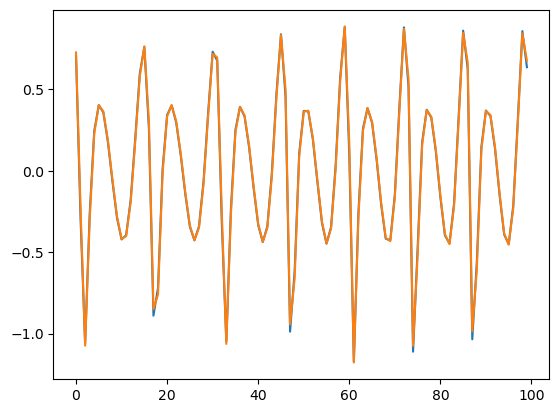

In [50]:
t = np.arange(len(fewWF)) * dt

plt.plot(fewWF.real[-100:])

t2 = np.arange(len(fewDSWF))*dt
plt.plot(fewDSWF.real[-100:])

In [51]:
get_mismatch(fewWF, fewDSWF)

np.float64(5.4219910065711474e-05)

So from what we see here, we can get mistmatches across the parameter space but each waveform takes minutes on CPUs with large eccentricities. 

Another good plot would be finding the max error of the two flux interpolants as a function of n and checking that it follows $2^{-4 n}$

In [52]:
# Let's try and get some information about the grid
import h5py
from few.utils.globals import get_file_manager

fp = "KerrEccEqFluxData.h5"
fm = get_file_manager()
file_path = fm.get_file(fp)

In [55]:
file_path

PosixPath('/Users/philip/Documents/Codes/FastEMRIWaveforms-Soton-Hackathon-2025/src/few/data/KerrEccEqFluxData.h5')

In [56]:
with h5py.File(file_path, "r") as fluxData:
            regionA = fluxData["regionA"]
            regionB = fluxData["regionB"]

            nxa = regionA.attrs["NU"]
            nya = regionA.attrs["NW"]
            nza = regionA.attrs["NZ"]

            nxb = regionB.attrs["NU"]
            nyb = regionB.attrs["NW"]
            nzb = regionB.attrs["NZ"]

            print("Region A: NU = {}, NW = {}, NZ = {}".format(nxa, nya, nza))
            print("Region B: NU = {}, NW = {}, NZ = {}".format(nxb, nyb, nzb))



Region A: NU = 129, NW = 65, NZ = 65
Region B: NU = 65, NW = 33, NZ = 33


In [58]:
2**7 +1

129

In [66]:
len(np.linspace(0, 1, nxa)[:: 8])

17

In [69]:
for i in range(1, 8):
    print(i, 2**i)

1 2
2 4
3 8
4 16
5 32
6 64
7 128


To keep things simple, let's just downsample by 2,4,8, and 16, though that last one will probably be garbage. The standalone plot will be complicated, but we should just start doing the histogram plot first since that's more straightforward ~ 1000 inspirals. We can then ask if they want mismatches, at which point I'm going to need some GPUs.

## Histogram of Dephasings

Dephaing is much quicker to calculate, so let's use that to practice. If we need mismatches, we are probably going to need cluster and GPU acess. 

In [102]:
import matplotlib.pyplot as plt
import numpy as np
from few.trajectory.inspiral import EMRIInspiral
from tqdm import tqdm
from numpy.random import seed, uniform, randint
import time

from few.utils.constants import YRSID_SI

#Importing Flux Trajectory
from few.trajectory.ode import KerrEccEqFlux
from few.utils.utility import get_p_at_t

In [115]:
full_flux = EMRIInspiral(func=KerrEccEqFlux)

In [127]:
skip_points = 2
downsampled_2 = EMRIInspiral(func=KerrEccEqFlux, downsample=[(skip_points, skip_points, skip_points), (skip_points, skip_points, skip_points)])

In [128]:
skip_points = 4
downsampled_4 = EMRIInspiral(func=KerrEccEqFlux,downsample=[(skip_points, skip_points, skip_points), (skip_points, skip_points, skip_points)])

In [129]:
skip_points = 8
downsampled_8 = EMRIInspiral(func=KerrEccEqFlux,downsample=[(skip_points, skip_points, skip_points), (skip_points, skip_points, skip_points)])

In [ ]:
# Jonathan's randomised parameters code

def gen_parameters(NEVAL, duration, seed_in=314159):

    traj_module = EMRIInspiral(func=KerrEccEqFlux)

    M_range = [1E5, 1E7]
    mu_range = [1,1E2]
    a_range = [-0.999, 0.999]
    e_range = [0.0, 0.9]

    x0 = 1.0  # will be ignored in Schwarzschild waveform

    _base_params = [
        1E5, # M
        10,  # mu
        0.0, # a
        0.0, # p0
        0.0, # e0
        x0,  # x0
    ]

    seed(seed_in)
    M_seed, mu_seed, a_seed, e_seed = randint(1E3, 1E5, size=4)

    seed(M_seed)
    M_list = uniform(low=M_range[0], high=M_range[1], size=NEVAL)
    seed(mu_seed)
    mu_list = uniform(low=mu_range[0], high=mu_range[1], size=NEVAL)
    seed(a_seed)
    a_list = uniform(low=a_range[0], high=a_range[1], size=NEVAL)
    seed(e_seed)
    e_list = uniform(low=e_range[0], high=e_range[1], size=NEVAL)

    output_params_list = []
    failed_params_list = []

    for i, (M, mu, a, e) in enumerate(zip(
        M_list,
        mu_list,
        a_list,
        e_list,
    )):

        try:
            # print(f"{i+1}:\t{M}, {mu}, {a}, {e}")
            updated_params = _base_params.copy()

            updated_params[0] = M
            updated_params[1] = mu
            updated_params[2] = a
            updated_params[4] = e
            updated_params[3] = get_p_at_t(
                traj_module,
                duration * 0.99,
                [updated_params[0], updated_params[1], updated_params[2], updated_params[4], 1.0],
                index_of_p=3,
                index_of_a=2,
                index_of_e=4,
                index_of_x=5,
                traj_kwargs={},
                xtol=2e-6,
                rtol=8.881784197001252e-6,
            )

            output_params_list.append(
                updated_params.copy()
            )
        except ValueError:
            failed_params_list.append([M, mu, a, e, duration])

    return output_params_list, failed_params_list

In [203]:
traj_pars = gen_parameters(50, 4.0, seed_in=314159)[0]

1:	7528789.672533787, 18.599958825030917, -0.2485878204509888, 0.83726948312581
2:	1281947.9377273768, 92.01630239858038, -0.08299699104745162, 0.44360966342249175
3:	6470770.719597565, 49.67224503303586, 0.33281313272540575, 0.4493765957762273
4:	334030.98578656407, 90.83657940236353, -0.4613139858838705, 0.13735398246421743
5:	9817473.768935325, 45.76450633996533, -0.46448154797934305, 0.18271605266570837
6:	4606459.965995781, 29.45151649024766, -0.18921559110232566, 0.40523908320809615
7:	5833629.230585137, 83.39670647878175, 0.36730262369998734, 0.19111824055192203
8:	5724335.498577699, 62.908418022182175, 0.8307974148439659, 0.2991648717751817
9:	9078585.17403247, 26.97613474863217, 0.618262064243729, 0.6537540018017322
10:	7795387.1860655155, 87.13229704536666, -0.269377375823748, 0.7092513021346759
11:	7777048.420717323, 81.37367062803811, -0.8588684769404039, 0.08022358003797483
12:	984136.430075891, 97.97347897464758, 0.02745498272978889, 0.8165732157856219
13:	118067.84680330

In [213]:
dephasings = np.zeros([len(traj_pars),3])

for i in range(len(traj_pars)):

    # print(f"Trajectory {i+1} of {len(traj_pars)}")
    t, p, e, xI, Phi_phi, Phi_theta, Phi_r  = full_flux(*traj_pars[i], T=T,err=1e-12)
    t2, p2, e2, xI2, Phi_phi2, Phi_theta2, Phi_r2  = downsampled_2(*traj_pars[i], T=T,err=1e-12)
    t4, p4, e4, xI4, Phi_phi4, Phi_theta4, Phi_r4  = downsampled_4(*traj_pars[i], T=T,err=1e-12)
    t8, p8, e8, xI8, Phi_phi8, Phi_theta8, Phi_r8  = downsampled_8(*traj_pars[i], T=T,err=1e-12)

    dephasings[i,0] = np.log10(np.abs(Phi_phi[-1] - Phi_phi2[-1]))
    dephasings[i,1] = np.log10(np.abs(Phi_phi[-1] - Phi_phi4[-1]))
    dephasings[i,2] = np.log10(np.abs(Phi_phi[-1] - Phi_phi8[-1]))



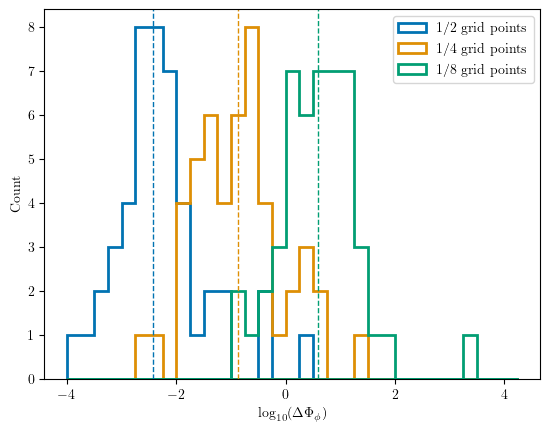

In [215]:
bins = np.arange(-4,4.5,0.25)
import seaborn as sns
colorblind_palette = sns.color_palette('colorblind')
import matplotlib.colors as mcolors

colorblind_hex = [mcolors.to_hex(color) for color in colorblind_palette]

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]

plt.hist(dephasings[:,0], bins=bins, histtype='stepfilled', facecolor='none', edgecolor=colorblind_hex[0], linewidth=2, label="1/2 grid points")
plt.hist(dephasings[:,1], bins=bins, histtype='stepfilled',facecolor='none', edgecolor=colorblind_hex[1], linewidth=2, label="1/4 grid points")
plt.hist(dephasings[:,2], bins=bins, histtype='stepfilled',facecolor='none', edgecolor=colorblind_hex[2], linewidth=2, label="1/8 grid points")

# Compute medians
median1 = np.median(dephasings[:,0])
median2 = np.median(dephasings[:,1])
median3 = np.median(dephasings[:,2])

# Add vertical lines at the medians
plt.axvline(median1, color=colorblind_hex[0], linestyle='dashed', linewidth=1)
plt.axvline(median2, color=colorblind_hex[1], linestyle='dashed', linewidth=1)
plt.axvline(median3, color=colorblind_hex[2], linestyle='dashed', linewidth=1)


plt.xlabel(r'$\log_{10}(\Delta \Phi_{\phi})$')
plt.ylabel("Count")
#plt.title("Dephasing after 4 years as a function of downsampling factor")
plt.legend()
plt.savefig("DownsampledFluxesHistogram.pdf")
plt.show()